In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as pltd


In [2]:
ngrams = pd.read_csv('../data/ngrams.csv', sep=',')
ngrams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6060 entries, 0 to 6059
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Hebrew_character  6060 non-null   object
 1   Names             6060 non-null   object
 2   Frequencies       6060 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 142.2+ KB


In [3]:
ngrams.Names.apply(str);

In [4]:
ngrams['n'] = list(map(lambda s: s.count('_') + 1, ngrams['Names']))

In [5]:
ngrams

,Hebrew_character,Names,Frequencies,n
0,אל,Alef_Lamed,800,2
1,כול,Kaf_Waw_Lamed,788,3
2,אשר,Alef_Shin_Resh,780,3
3,על,Ayin_Lamed,710,2
4,את,Alef_Taw,688,2
...,...,...,...,...
6055,ויטמאו,Waw_Yod_Tet_Mem-medial_Alef_Waw,2,6
6056,מקרה,Mem-medial_Qof_Resh_He,2,4
6057,פלאך,Pe_Lamed_Alef_Kaf-final,2,4
6058,באמר,Bet_Alef_Mem-medial_Resh,2,4


In [6]:
bigrams = ngrams[ngrams['n'] == 2]

In [7]:
bigrams

,Hebrew_character,Names,Frequencies,n
0,אל,Alef_Lamed,800,2
3,על,Ayin_Lamed,710,2
4,את,Alef_Taw,688,2
5,כי,Kaf_Yod,423,2
7,עד,Ayin_Dalet,340,2
...,...,...,...,...
5263,יז,Yod_Zayin,2,2
5304,כא,Kaf_Alef,2,2
5362,נץ,Nun-medial_Tasdi-final,2,2
5738,קל,Qof_Lamed,2,2


In [8]:
bigrams['first'] = list(map(lambda s: s.split('_')[0], bigrams['Names']))
bigrams['second'] = list(map(lambda s: s.split('_')[1], bigrams['Names']))


C:\Users\matti\AppData\Local\Temp\ipykernel_20464\3437728828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigrams['first'] = list(map(lambda s: s.split('_')[0], bigrams['Names']))
C:\Users\matti\AppData\Local\Temp\ipykernel_20464\3437728828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigrams['second'] = list(map(lambda s: s.split('_')[1], bigrams['Names']))


In [9]:
frequencies = defaultdict(int)
for first, second, freq in zip(bigrams['first'], bigrams['second'], bigrams['Frequencies']):
    frequencies[f'{first}_{second}'] += freq

In [10]:
with open('../data/bigrams.csv', 'w') as file:
    file.write('first,second,count\n')
    for key in frequencies:
        first, second = key.split('_')
        file.write(f"{first},{second},{frequencies[key]}\n")

In [183]:
frequencies

defaultdict(int,
            {'Alef_Lamed': 800,
             'Ayin_Lamed': 710,
             'Alef_Taw': 688,
             'Kaf_Yod': 423,
             'Ayin_Dalet': 340,
             'Dalet_Yod': 339,
             'Mem_Nun': 338,
             'Lamed_Alef': 286,
             'Ayin_Mem': 279,
             'Kaf_He': 209,
             'Kaf_Lamed': 198,
             'Lamed_Waw': 185,
             'Bet_Waw': 156,
             'Lamed_He': 154,
             'Lamed_Yod': 152,
             'Alef_Mem': 132,
             'Alef_Waw': 127,
             'Bet_He': 125,
             'He_Mem': 124,
             'Dalet_Nun': 117,
             'Mem_He': 88,
             'Shin_Mem': 73,
             'Nun_Waw': 69,
             'Lamed_Kaf': 69,
             'Kaf_Nun': 65,
             'Bet_Mem': 65,
             'Pe_Yod': 59,
             'Bet_Nun': 58,
             'Waw_Waw': 56,
             'He_Waw': 46,
             'Waw_Alef': 44,
             'Mem_Yod': 42,
             'Lamed_Bet': 41,
            

In [10]:
bigrams

,Hebrew_character,Names,Frequencies,n,first,second
0,אל,Alef_Lamed,800,2,Alef,Lamed
3,על,Ayin_Lamed,710,2,Ayin,Lamed
4,את,Alef_Taw,688,2,Alef,Taw
5,כי,Kaf_Yod,423,2,Kaf,Yod
7,עד,Ayin_Dalet,340,2,Ayin,Dalet
...,...,...,...,...,...,...
5263,יז,Yod_Zayin,2,2,Yod,Zayin
5304,כא,Kaf_Alef,2,2,Kaf,Alef
5362,נץ,Nun-medial_Tasdi-final,2,2,Nun-medial,Tasdi-final
5738,קל,Qof_Lamed,2,2,Qof,Lamed


In [11]:
grams = {}
total = {}

for first, second, freq in zip(bigrams['first'], bigrams['second'], bigrams['Frequencies']):
    
    if '-' in first:
        first = first.split('-')[0]

    if '-' in second:
        second = second.split('-')[0]
        
    try:
        grams[first].append((second, freq))
    except KeyError:
        grams[first] = [(second, freq)]
    try:
        total[first] += freq
    except KeyError:
        total[first] = freq

In [162]:
letter = 'Mem'
relative_frequency(letter, bigrams)

(0, 770)

In [84]:
def relative_frequency(letter, df_bg):
    n_first = np.sum(df_bg[df_bg['first'] == letter]['Frequencies'])
    n_second = np.sum(df_bg[df_bg['second'] == letter]['Frequencies'])
    return n_first, n_second
    

In [157]:
class Letter:
    def __init__(self, data, name, eps=1e-2):
        if '-' in name:
            name = name.split('-')[0]
        self.name = name
        self.followers = defaultdict(float)
        
        n_first, n_second = relative_frequency(name, data)
        f_eos = max(n_second - n_first, n_first * eps)
        
        data = data[data['first'] == name]
        
        self.followers['EOS'] = f_eos
        n_first += f_eos
        
        for follower, freq in zip(data['second'], data['Frequencies']):
            if '-' in follower:
                follower = follower.split('-')[0]
            self.followers[follower] += freq
            
        for follower in self.followers:
            self.followers[follower] /= n_first
            
    def random_next(self):
        rand_float = np.random.random()
        for follower in self.followers:
            rand_float -= self.followers[follower]
            if rand_float <= 0:
                return follower

In [168]:
letters = {}
l_set = set(bigrams['first']) | set(bigrams['second'])
for letter in l_set:
    print(letter)
    letters[letter] = Letter(bigrams, letter)

Gimel
Bet
Mem-medial
Nun-medial
Shin
Tet
Alef
Qof
Samekh
Pe
Pe-final
Het
Mem
Tsadi
Zayin
Dalet
Taw
Kaf
He
Yod
Ayin
Waw
Resh
Kaf-final
Tasdi-final
Nun-final
Lamed


In [170]:
word = 'Alef'
current = 'Alef'
for _ in range(10):
    try:
        let = letters[current]
    except KeyError:
        print(current)
    next = let.random_next()
    word += f'_{next}'
    current = next
    
print(word)

Nun
Nun
Nun
Nun
Nun
Nun
Nun
Nun
Alef_Taw_Nun_Nun_Nun_Nun_Nun_Nun_Nun_Nun_Nun


In [143]:
def leaky_norm(freq):
    freq = freq - 0.5
    freq = (np.tanh(5*freq) + 0.5) / 1.5
    return freq
    
def edge_frequency(n_edge, n_total, alpha=0.05):
    f_edge = n_edge / n_total
    return leaky_norm(f_edge)

defaultdict(float, {})

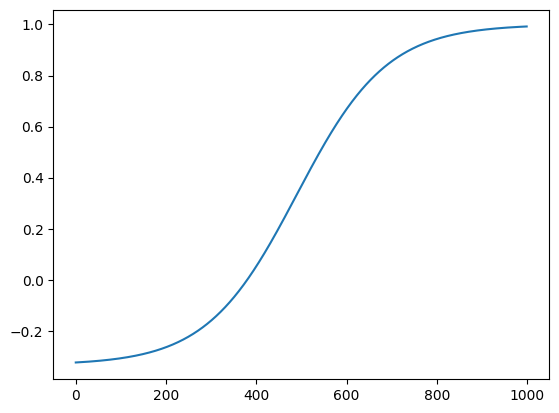

In [145]:
fig, ax = plt.subplots()
func = list(map(leaky_norm, np.linspace(0.01, 1.01, 1000)))
ax.plot(func)